In [112]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def create_dataframe(path):
    total_df = pd.DataFrame()
    folders = os.listdir(path)
    for folder in folders:
        files = os.listdir(os.path.join(path, folder))
        for file in files:
            if file.endswith(".json"):
                df = pd.read_json(os.path.join(path,folder,file))
                total_df = pd.concat([total_df,df])
    return  total_df

total_df = create_dataframe("s3p")

In [20]:
total_df.head(4)

,id,fechaCaptura,expediente,institucionDependencia,particularSancionado,objetoContrato,autoridadSancionadora,tipoSancion,causaMotivoHechos,acto,resolucion,multa,inhabilitacion,observaciones,tipoFalta,responsableSancion,directorGeneral,apoderadoLegal,documentos,__v
0,9,2023-10-19T00:00:00Z,J040/2021,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'ABRAHAM ERNESTO COSIO T...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J040/2021,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 3047, 'moneda': {'clave': 'MXN', 'va...","{'plazo': '15 AÑOS 2 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2023-11-09T00:00:00Z,J157/2022,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,"{'nombreRazonSocial': 'ALVARO CAMPOS OROZCO', ...",SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J157/2022,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 19244, 'moneda': {'clave': 'MXN', 'v...","{'plazo': '4 AÑOS', 'fechaInicial': '2022-11-2...",,NaN,NaN,NaN,NaN,NaN,NaN
2,30,2023-11-09T00:00:00Z,J168/2019,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'CRISTIAN SALVADOR AGUIL...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J168/2019,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 0, 'moneda': {'clave': 'MXN', 'valor...","{'plazo': '12 AÑOS 6 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN
3,13,2023-10-19T00:00:00Z,J026/2020,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'DIEGO ARMANDO VILCHES O...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J026/2020,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...",NaN,"{'plazo': '16 AÑOS 8 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
total_df

,id,fechaCaptura,expediente,institucionDependencia,particularSancionado,objetoContrato,autoridadSancionadora,tipoSancion,causaMotivoHechos,acto,resolucion,multa,inhabilitacion,observaciones,tipoFalta,responsableSancion,directorGeneral,apoderadoLegal,documentos,__v
0,9,2023-10-19T00:00:00Z,J040/2021,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'ABRAHAM ERNESTO COSIO T...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J040/2021,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 3047, 'moneda': {'clave': 'MXN', 'va...","{'plazo': '15 AÑOS 2 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2023-11-09T00:00:00Z,J157/2022,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,"{'nombreRazonSocial': 'ALVARO CAMPOS OROZCO', ...",SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J157/2022,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 19244, 'moneda': {'clave': 'MXN', 'v...","{'plazo': '4 AÑOS', 'fechaInicial': '2022-11-2...",,NaN,NaN,NaN,NaN,NaN,NaN
2,30,2023-11-09T00:00:00Z,J168/2019,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'CRISTIAN SALVADOR AGUIL...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J168/2019,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 0, 'moneda': {'clave': 'MXN', 'valor...","{'plazo': '12 AÑOS 6 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN
3,13,2023-10-19T00:00:00Z,J026/2020,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'DIEGO ARMANDO VILCHES O...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J026/2020,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...",NaN,"{'plazo': '16 AÑOS 8 MESES', 'fechaInicial': '...",,NaN,NaN,NaN,NaN,NaN,NaN
4,19,2023-10-20T00:00:00Z,J029/2022,{'nombre': 'PODER JUDICIAL DEL ESTADO DE BAJA ...,{'nombreRazonSocial': 'EDUARDO HERNANDEZ LOPEZ...,SENTENCIA CONDENATORIA,JUEZ DE CONTROL,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",J029/2022,DELITO COMETIDO POR PARTICULAR,"{'sentido': 'SENTENCIA CONDENATORIA', 'url': '...","{'monto': 96, 'moneda': {'clave': 'MXN', 'valo...","{'plazo': '2 AÑOS 3 MESES', 'fechaInicial': '2...",,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,067500043/2006,2007-01-08,067500043/2006,{'nombre': 'LOTERIA NACIONAL PARA LA ASISTENCI...,"{'nombreRazonSocial': 'ELIPSE SA DE CV', 'obje...",Dato no proporcionado,LOTERIA NACIONAL PARA LA ASISTENCIA P�BLICA,"[{'clave': 'M', 'valor': 'MULTA'}, {'clave': '...",PRESENT� INFORMACI�N FALSA RESPECTO A ENCONTRA...,Dato no proporcionado,{'sentido': 'SANCIONATORIA CON MULTA E INHABIL...,"{'moneda': {'clave': 'MXN', 'valor': 'Dato no ...","{'plazo': 'Dato no proporcionado', 'fechaInici...",Dato no proporcionado,Dato no proporcionado,"{'nombres': 'Dato no proporcionado', 'primerAp...",NaN,NaN,NaN,NaN
140,113100006/2004,2007-01-18,113100006/2004,{'nombre': 'INSTITUTO NACIONAL PARA LA EDUCACI...,"{'nombreRazonSocial': 'DIECSA S.A. DE C.V.', '...",Dato no proporcionado,INSTITUTO NACIONAL PARA LA EDUCACI�N DE LOS AD...,"[{'clave': 'M', 'valor': 'MULTA'}, {'clave': '...",PROPORCIONAR INFORMACION FALSA,Dato no proporcionado,{'sentido': 'SANCIONATORIA CON MULTA E INHABIL...,"{'moneda': {'clave': 'MXN', 'valor': 'Dato no ...","{'plazo': 'Dato no proporcionado', 'fechaInici...",MEDIANTE OFICIO 322-SAT-R8-L62-5-1-41486 DE FE...,Dato no proporcionado,"{'nombres': 'JORGE ULICES S�NCHEZ ONOFRE', 'p...",NaN,NaN,NaN,NaN
141,068100018/2006,2007-01-18,068100018/2006,{'nombre': 'PRONOSTICOS PARA LA ASISTENCIA P�B...,{'nombreRazonSocial': 'MULTISERVICIOS Y EQUIPO...,Dato no proporcionado,PRONOSTICOS PARA LA ASISTENCIA P�BLICA,"[{'clave': 'M', 'valor': '

## Resoluciones

In [22]:
resoluciones = []
for index,row in total_df.iterrows():
    resolucion = row['resolucion']
    if(type(resolucion) != float):
        if('sentido' in resolucion):
            resoluciones.append(resolucion['sentido'])
        else:
            resoluciones.append("Dato no proporcionado")
    else:
        resoluciones.append("Dato no proporcionado")

print(f"Existen {len(np.unique(resoluciones))} resoluciones diferentes")
for resolucion in np.unique(resoluciones):
    print(resolucion)

Existen 14 resoluciones diferentes

ABSOLUTORIA
Dato no proporcionado
SANCION ECONOMICA
SANCIONADO CON INHABILITACIÓN Y SANCIÓN ECONÓMICA
SANCIONATORIA
SANCIONATORIA CON MULTA
SANCIONATORIA CON MULTA E INHABILITACI�N
SE DETERMINA LA EXISTENCIA DE RESPONSABILIDAD ADMINISTRATIVA GRAVE DE USO INDEBIDO DE RECURSOS PUBLICOS, PREVISTA EN EL ARTICULO 71, DE LA LEY GENERAL DE RESPONSABILIDADES ADMINISTRATIVAS, POR PARTE DE ALEJANDRO VALERIO PAYAN, CUYAS FALTAS FUERON IMPUTADAS EN EL INFORME DE PRESUNTA RESPONSABILIDAD DICTADO EN LOS AUTOS DEL EXPEDIENTE DE INVESTIGACION SISCOE/IA/17/2018, POR LA TITULAR DE LA UNIDAD INVESTIGADORA DE LA SECRETARIA DE CONTROL INTERNO Y COMBATE A LA CORRUPCION DEL MUNICIPIO DE CORREGIDORA, QUERETARO. DERIVADO DE LO ANTERIOR, SE LE IMPUSO UNA SANCION CONSISTENTE EN UNA INHABILITACION TEMPORAL PARA PARTICIPAR EN ADQUISICIONES, ARRENDAMIENTOS, SERVICIOS U OBRAS PUBLICAS, SEGUN CORRESPONDA, ANTE CUALQUIER ENTE PUBLICO, POR UN PERIODO DE 4 (CUATRO) AÑOS.
SE DETERMINA 

## ObjetoContrato

In [23]:
objetos_contrato = []
for index,row in total_df.iterrows():
    obj_contrato = row['objetoContrato']
    if (type(obj_contrato) != float):
        objetos_contrato.append(obj_contrato)
    else:
        objetos_contrato.append("Dato no proporcionado")

print(f"Existen {len(np.unique(objetos_contrato))} objetos contrato diferentes")
for obj_contrato in np.unique(objetos_contrato):
    print(obj_contrato)

Existen 6 objetos contrato diferentes

ADQUISICION DE ANAQUELES CON RECURSOS RADICADOS EN LA PARTIDA PRESUPUESTARIA 51106
Dato no proporcionado
EL 19 DE JUNIO DE 2015 , FUE FIRMADO EL CONTRATO DE OBRA PUBLICA A PRECIO ALZADO Y TIEMPO DETERMINADO MC- EST-EMP-12-5-2014-00, EN EL QUE FIGURARON COMO CONTRATANTE EL MUNICIPIO DE CORREGIDORA, QUERETARO, A TRAVES DEL SINDICO MUNICIPAL, SECRETARIO DEL AYUNTAMIENTO, Y EL SECRETARIO DE DESARROLLO URBANO Y OBRAS PUBLICAS; Y COMO CONTRATISTAS LA PERSONA MORAL DENOMINADA HORUS GRUPO EMPRESARIAL, S.A. DE C.V., Y OTRO. “...PRIMERA. - ‘LA CONTRATANTE’ ENCOMIENDA A ‘LA CONTRATISTA’ LA REALIZACION DE LOS TRABAJOS CONSISTENTES EN: PUENTE SOBRE RIVERA DEL RIO Y PARQUE LINEAL UBICADA EN EL PUEBLITO, CORREGIDORA, QRO., CON NUMERO DE CONTRATO MC-EST- EMP-12-5-2014-00, LA CUAL HABRA DE REALIZAR EN LOS TERMINOS INDICADOS EN LOS ANEXOS DEL PRESENTE CONTRATO QUE A CONTINUACION DE ENUNCIAN...”.
LICITACIÓN PÚBLICA
SENTENCIA CONDENATORIA


## Autoridades sancionadoras

In [24]:
autoridades_sancionadoras = []
for index,row in total_df.iterrows():
    autoridades_sancionadora = row['autoridadSancionadora']
    if (type(autoridades_sancionadora) != float):
        autoridades_sancionadoras.append(autoridades_sancionadora)
    else:
        autoridades_sancionadoras.append("Dato no proporcionado")

print(f"Existen {len(np.unique(autoridades_sancionadoras))} autoridades sancionadoras diferentes")
for autoridad in np.unique(autoridades_sancionadoras):
    print(autoridad)

Existen 154 autoridades sancionadoras diferentes

280
ADMINISTRACION PORTUARIA INTEGRAL DE DOS BOCAS, S.A. DE C.V.
ADMINISTRACI�N DEL SISTEMA PORTUARIO NACIONAL PROGRESO S.A. DE C.V.
AEROPUERTO  INTERNACIONAL DE LA CIUDAD DE MEXICO S.A. DE C.V.
AEROPUERTOS Y SERVICIOS AUXILIARES
AGROASEMEX, S.A.
BANCO DEL BIENESTAR
BANCO NACIONAL DE CREDITO RURAL, S.N.C.
BANCO NACIONAL DE OBRAS Y SERVICIOS P�BLICOS, S.N.C.
BANCO NACIONAL DEL EJERCITO, FUERZA AEREA Y ARMADA, S.N.C.
CAMINOS Y PUENTES FEDERALES DE INGRESOS Y SERVICIOS CONEXOS
CENTRO DE INVESTIGACIONES Y ESTUDIOS SUPERIORES EN ANTROPOLOGIA SOCIAL
CENTRO DE INVESTIGACI�N EN CIENCIAS DE INFORMACI�N GEOESPACIAL, A.C.
CENTRO DE INVESTIGACI�N Y DESARROLLO TECNOLOGICO EN ELECTROQUIMICA, S. C.
CENTRO DE INVESTIGACI�N Y DOCENCIA ECONOMICAS, A.C.
CENTRO DE INVESTIGACI�N Y ESTUDIOS AVANZADOS DEL IPN
CENTRO NACIONAL DE INTELIGENCIA
CENTRO NACIONAL DE METROLOGIA
CENTRO REGIONAL DE ALTA ESPECIALIDAD DE CHIAPAS
CFE DISTRIBUCI�N
CFE GENERACI�N I
CFE TRAN

## Actos

In [25]:
actos = []
for index,row in total_df.iterrows():
    acto = row['acto']
    if (type(acto) != float):
        actos.append(acto)
    else:
        actos.append("Dato no proporcionado")

print(f"Existen {len(np.unique(actos))} actos delictivos diferentes")
for acto in np.unique(actos):
    print(acto)

Existen 11 actos delictivos diferentes

AEF-150/2021 signado por el Titular de la Auditoría Especial Forense de Auditoría Superior del Estado
ALEJANDRO VALERIO PAYAN COMO COAUTOR DE LA CONDUCTA INFRACTORA Y LA PERSONA MORAL ENCAUSADA , TENIAN HASTA EL DIA 01 DE JUNIO DE 2018 PARA REINTEGRAR EN FAVOR DEL MUNICIPIO DE CORREGIDORA, QUERETARO, LA CANTIDAD DE $4,440,412.80 (CUATRO MILLONES CUATROCIENTOS CUARENTA MIL CUATROCIENTOS DOCE PESOS 80/100 MONEDA NACIONAL), SIN QUE A LA FECHA EN QUE SE EMITIO EL ACUERDO DE CALIFICACION DE LA FALTA ADMINISTRATIVA, (16 DE AGOSTO DE 2018), SE HUBIERA DADO CUMPLIMIENTO A LO REQUERIDO EN EL CONSIDERANDO SEXTO DE LA RESOLUCION DE FECHA 13 (TRECE) DE FEBRERO DE 2018 (DOS MIL DIECIOCHO), DICTADA EN LOS AUTOS DEL EXPEDIENTE SDUOP/PRA/002/2017.
Con la ayuda de dos servidoras públicas trasladó en horario laboral a un lugar donde se le practicaría en contra de su voluntad una prueba de embarazo es decir un actividad distinta para la cual estaba previsto dicho r

## Sanciones

In [89]:
sanciones = []
for index,row in total_df.iterrows():
    tipo_sanciones = row['tipoSancion']
    if(type(tipo_sanciones) != float):
        for tipo in tipo_sanciones:
            if('valor' in tipo):
                sanciones.append(tipo['valor'])
            else:
                sanciones.append("Dato no proporcionado")
    else:
        sanciones.append("Dato no proporcionado")

print(f"Existen {len(np.unique(sanciones))} sanciones diferentes, y cada sancionado puede tener una lista de estas")
for sancion in np.unique(sanciones):
    print(sancion)

Existen 9 sanciones diferentes, y cada sancionado puede tener una lista de estas
INHABILITACIÓN
INHABILITADO
Inhabilitación
MULTA
MULTADO
OTRO
SANCION ECONOMICA
SANCIÓN ECONÓMICA
Sanción económica


## Estadísticas multa


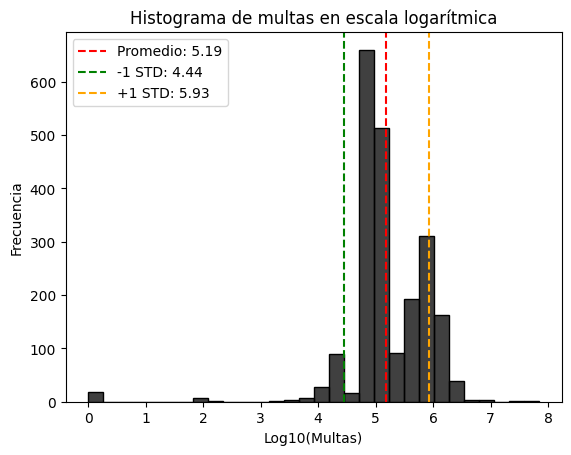

In [97]:
multas = []
for index,row in total_df.iterrows():
    multa = row['multa']
    if(type(multa) != float):
        if('monto' in multa):
            if(multa['monto'] is not None):
                multas.append(multa['monto'])


multas = np.array(multas)
multas = multas[np.where(multas > 0)]
log_multas = np.log10(multas)

promedio_log = np.mean(log_multas)
std_log = np.std(log_multas)
# Crear el histograma
plt.figure()
sns.histplot(log_multas, bins=30, color='black')
plt.axvline(promedio_log, color='red', linestyle='--', label=f'Promedio: {promedio_log:.2f}')
plt.axvline(promedio_log - std_log, color='green', linestyle='--', label=f'-1 STD: {promedio_log - std_log:.2f}')
plt.axvline(promedio_log + std_log, color='orange', linestyle='--', label=f'+1 STD: {promedio_log + std_log:.2f}')

# Personalizar el gráfico
plt.title("Histograma de multas en escala logarítmica")
plt.xlabel("Log10(Multas)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Inhabilitación

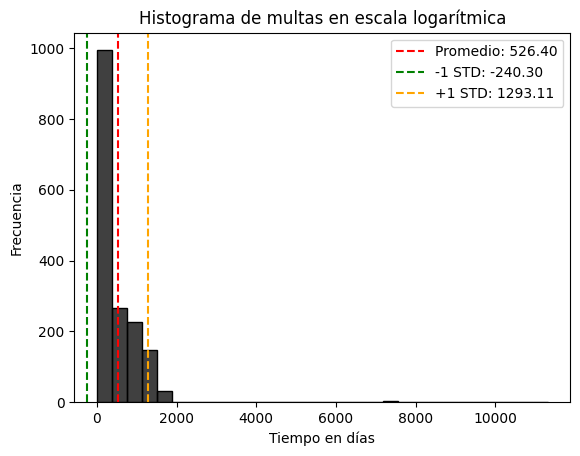

In [132]:
duraciones = []
for index,row in total_df.iterrows():
    inhabilitacion = row['inhabilitacion']
    if(type(inhabilitacion) != float):
        if('fechaInicial' in inhabilitacion and 'fechaFinal' in inhabilitacion and 'plazo' in inhabilitacion):
            if(inhabilitacion['fechaInicial'] != "-" and inhabilitacion['fechaInicial'] != " " and inhabilitacion['fechaFinal'] != "-" and inhabilitacion['fechaFinal'] != " "):
                try:
                    fechaInicial = pd.to_datetime(inhabilitacion['fechaInicial'])
                    fechaFinal = pd.to_datetime(inhabilitacion['fechaFinal'])
                    duracion = (fechaFinal - fechaInicial).days
                    if(type(duracion) != float):
                        duraciones.append(duracion)
                except Exception as e:
                    pass
            elif(inhabilitacion['plazo'] != 'Dato no proporcionado'):
                duraciones.append(inhabilitacion['plazo'])


promedio = np.mean(duraciones)
std = np.std(duraciones)
plt.figure()
sns.histplot(duraciones, bins=30, color='black')
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.2f}')
plt.axvline(promedio - std, color='green', linestyle='--', label=f'-1 STD: {promedio - std:.2f}')
plt.axvline(promedio + std, color='orange', linestyle='--', label=f'+1 STD: {promedio + std:.2f}')

# Personalizar el gráfico
plt.title("Histograma de multas en escala logarítmica")
plt.xlabel("Tiempo en días")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()